# Charts

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv("./data/IMDB-Movie-Data.csv", index_col="Title")

In [5]:
df.sample(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
The Whole Truth,629,"Crime,Drama,Mystery",A defense attorney works to get his teenage cl...,Courtney Hunt,"Keanu Reeves, Renée Zellweger, Gugu Mbatha-Raw...",2016,93,6.1,10700,NaN,NaN
Keanu,391,"Action,Comedy",When an L.A. drug kingpin's kitten unexpectedl...,Peter Atencio,"Keegan-Michael Key, Jordan Peele, Tiffany Hadd...",2016,100,6.3,31913,20.57,63.0
Safe Haven,488,"Drama,Romance,Thriller",A young woman with a mysterious past lands in ...,Lasse Hallström,"Julianne Hough, Josh Duhamel, Cobie Smulders,D...",2013,115,6.7,84765,71.35,34.0


In [6]:
df["Genre"] = df["Genre"].str.split(",")

In [7]:
df = df.explode("Genre")

In [8]:
df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Guardians of the Galaxy,1,Adventure,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Guardians of the Galaxy,1,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Prometheus,2,Mystery,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [9]:
mydata = df[ df["Genre"].isin(["Action","Adventure", "Sci-Fi"])]

In [10]:
votes = mydata.pivot_table('Votes', index='Year', columns='Genre', aggfunc='sum')
votes

Genre,Action,Adventure,Sci-Fi
Year,,,
2006,3559673,3523619,2175616
2007,3720243,3467813,1616169
2008,7885922,3648741,1991008
2009,4963270,6656551,2562534
2010,7268992,7774100,2629791
2011,6146274,5367334,4170205
2012,7050597,6238296,3324587
2013,8062729,6959905,4495531
2014,9801483,9029158,6567704


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use Seaborn styles

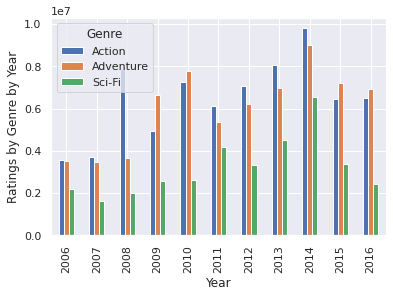

In [44]:
votes.plot(kind="bar");
plt.ylabel('Ratings by Genre by Year');

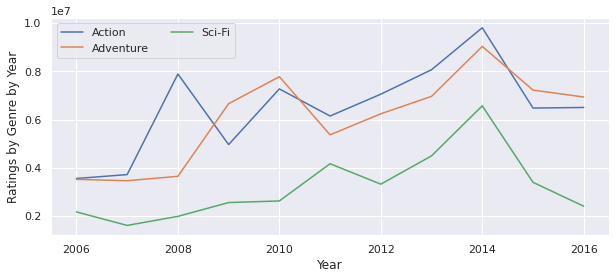

In [50]:
votes.plot(figsize=(10,4), kind="line");
plt.ylabel('Ratings by Genre by Year');
plt.legend(ncol=2, loc='upper left');

The same result can be achieved using `plt.plot()`

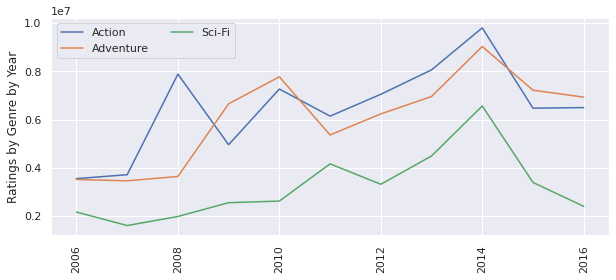

In [49]:
plt.figure(figsize=(10,4))
plt.plot(votes)
plt.legend(votes.columns, ncol=2, loc='upper left')
plt.xticks(rotation = 90)
plt.ylabel('Ratings by Genre by Year');

histogram ...

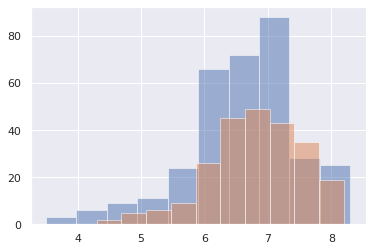

In [51]:
plt.hist(df[df["Year"]==2015]["Rating"], alpha=0.5)
plt.hist(df[df["Year"]==2013]["Rating"], alpha=0.5);

### seaborn.kdeplot
Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`. For additional information check [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

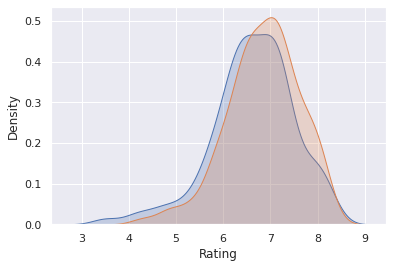

In [15]:
sns.kdeplot(df[df["Year"]==2015]["Rating"], shade=True)
sns.kdeplot(df[df["Year"]==2013]["Rating"], shade=True);

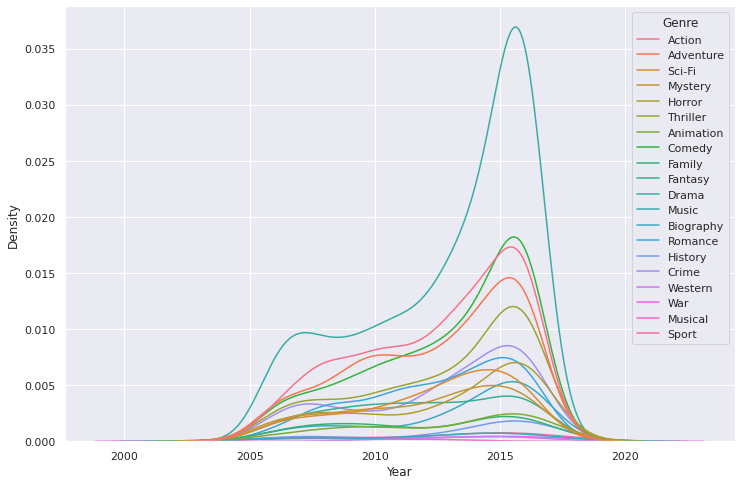

In [16]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x="Year", hue="Genre");

## seaborn.catplot
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
Check [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) for additional info

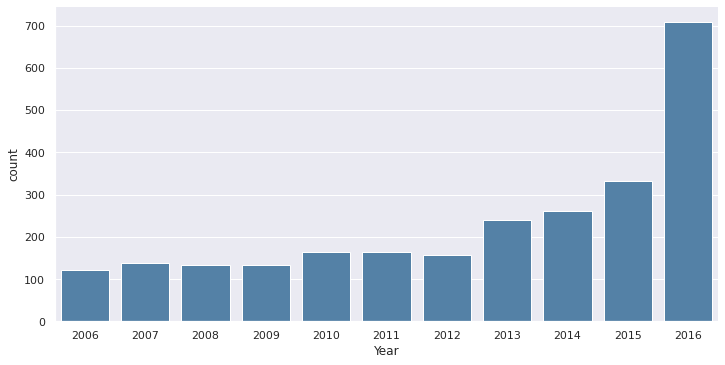

In [17]:
sns.catplot(data=df, x="Year", kind="count", aspect=2, color='steelblue');

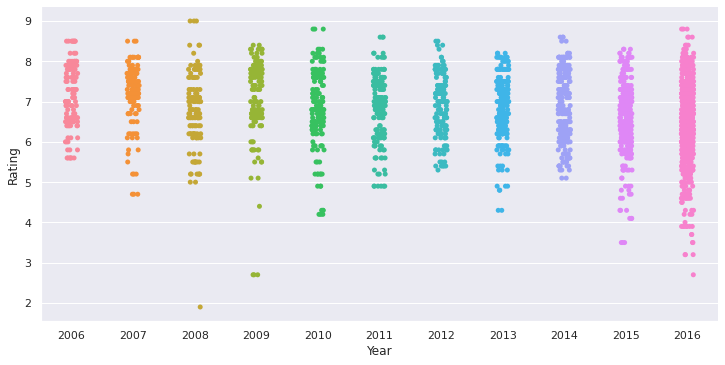

In [18]:
sns.catplot(data=df, x="Year", y="Rating", aspect=2);

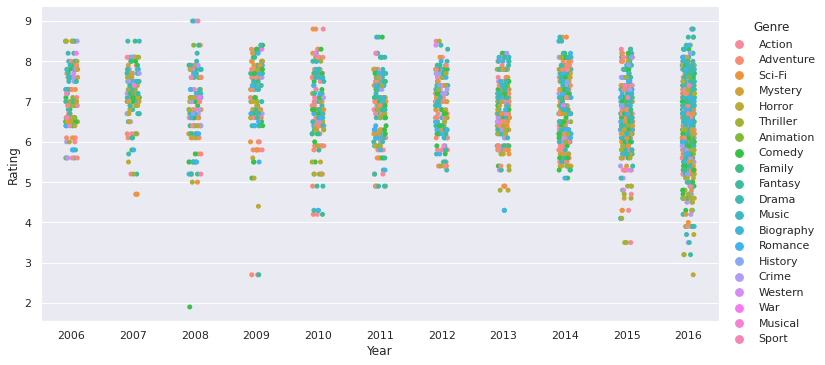

In [19]:
sns.catplot(data=df, x="Year", y="Rating", hue="Genre", aspect=2);

For additional examples, check [seaborn: statistical data visualization](https://seaborn.pydata.org/index.html)
and [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
    